## Observations and Insights 

In [334]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merged = pd.merge(mouse_metadata, study_results, on=['Mouse ID'])
# Display the data table for preview
mouse_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice.
len(mouse_merged["Mouse ID"])


1893

In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
series=mouse_merged[mouse_merged[['Mouse ID','Timepoint']].duplicated()]

In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
series


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
run=mouse_merged[mouse_merged['Mouse ID']!='g989']
run

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Checking the number of mice in the clean DataFrame.
len(run['Mouse ID'].unique())

248

## Summary Statistics

In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean= run.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)']
median= run[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
variance= run[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
stdev= run[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
SEM=run[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary= pd.DataFrame()
summary["Mean"]= drug_mean
summary["Median"]= median
summary["Variance"]=variance
summary["STDEV"]=stdev
summary["SEM"]=SEM
summary

,Mean,Median,Variance,STDEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
run.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

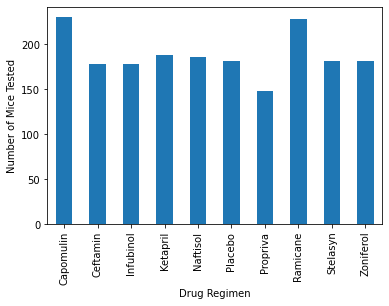

In [328]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice=run.groupby(["Drug Regimen"]).count()
mice["Timepoint"].plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

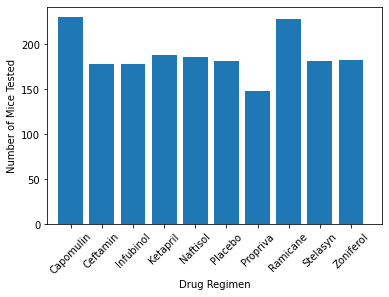

In [327]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(mice.index,mice["Timepoint"])
plt.xlim(-0.75, 10)
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

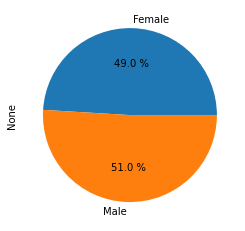

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender= run.groupby(['Sex']).size()
gender.plot(kind='pie', autopct='%.1f %%')

([<matplotlib.patches.Wedge at 0x271e030c808>,
 [Text(0.03308201408261561, 1.0995024239828841, ''),
  Text(-0.0330820140826155, -1.0995024239828841, '')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0 %'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0 %')])

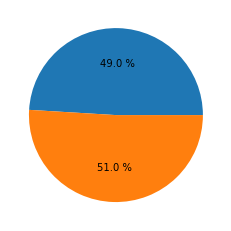

In [200]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender,autopct='%.1f %%')


## Quartiles, Outliers and Boxplots

In [278]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
run['maxtime']=run.groupby(["Mouse ID"]).transform('max')['Timepoint']
run
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maximum= run[run["Timepoint"]==run['maxtime']]
drug_max= maximum[(maximum["Drug Regimen"]=='Capomulin') | (maximum["Drug Regimen"]=="Ramicane") | (maximum["Drug Regimen"]=="Infubinol") | (maximum["Drug Regimen"]=="Ceftamin")]
drug_max


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,maxtime
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3,45
1813,y163,Infubinol,Female,17,27,45,67.685569,3,45
1845,y769,Ceftamin,Female,6,27,45,68.594745,4,45
1855,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [267]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=drug_max["Drug Regimen"].unique()
drugs
# Create empty list to fill with tumor vol data (for plotting)
tumor= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    tumor_volume= drug_max.loc[drug_max["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    tumor.append(tumor_volume)
    
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
          
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)   
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volume.loc[(tumor_volume<lower_bound)| (tumor_volume>upper_bound)]
    print(f"{drug} potential outliers: {outliers}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


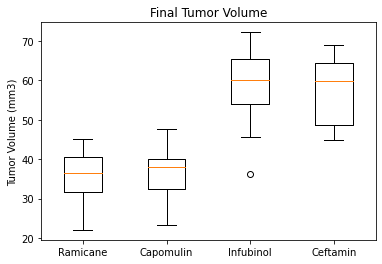

In [283]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(drugs)
ax1.boxplot(tumor)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse s185')

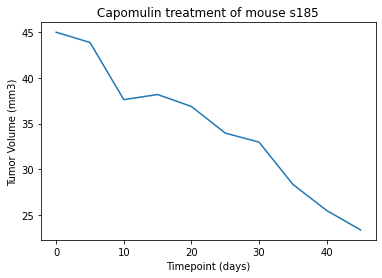

In [314]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap= run[run["Drug Regimen"]=='Capomulin']
cap_mouse= cap[cap["Mouse ID"]== 's185']
mouse_tv= cap_mouse["Tumor Volume (mm3)"]
mouse_tp= cap_mouse['Timepoint']
plt.plot(mouse_tp,mouse_tv)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse s185")

C:\Users\danie\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Average Tumor Volume (mm3)')

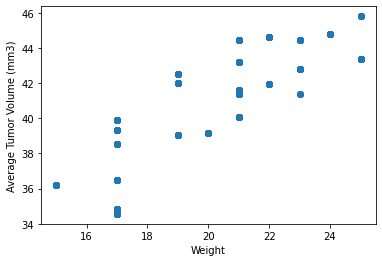

In [326]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap["Avg Tum"]= cap.groupby(["Mouse ID"]).transform('mean')["Tumor Volume (mm3)"]
plt.scatter(cap["Weight (g)"], cap["Avg Tum"])
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between both factors is 0.83


Text(0, 0.5, 'Average Tumor Volume (mm3)')

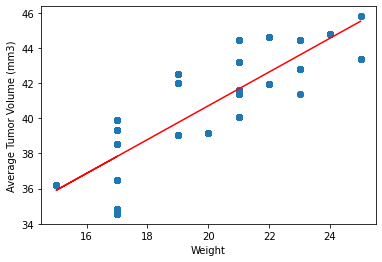

In [335]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation= st.pearsonr(cap["Weight (g)"], cap["Avg Tum"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values= cap['Weight (g)']
y_values= cap["Avg Tum"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = cap["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap["Weight (g)"], cap["Avg Tum"])
plt.plot(cap["Weight (g)"],regress_values,"r-")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")